In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

### Loading the data

In [107]:
income_df = pd.read_csv("adult-all.csv", na_values='?')
income_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [108]:
income_df.shape

(48841, 15)

We have loaded the csv file with "?" as the null values present in the dataset.

In [55]:
# renaming the column names
income_df.rename(columns={'39': 'age', 'State-gov': 'workclass', '77516': 'fnlwgt','Bachelors': 'education','13': 'education-num', 'Never-married': 'marital-status', 'Adm-clerical': 'occupation', 'Not-in-family': 'relationship', 'White': 'race', 'Male': 'sex', '2174': 'capital-gain', '0': 'capital-loss', '40': 'hours-per-week', 'United-States': 'native-country', '<=50K': 'salary'}, inplace=True)
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,1.896664e+05,10.078029,1079.045208,87.504105,40.422391
std,13.710650,1.056039e+05,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Data Cleaning

In [46]:
income_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
salary               0
dtype: int64

There are 2799 null values in workclass, 2809 null values in occupation and 850 null values in native-country column.
Total null values - 6465 

In [48]:
clean_df = income_df.dropna()
clean_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

We have eliminated the missing values (that is "?") from the dataset

In [50]:
# salary dataset info to find columns and count of the data 
clean_df.shape

(45221, 15)

After eliminating missing values the dataset has 45221 records and 15 columns

### Separating the target variable from the other feature variables

In [58]:
X = clean_df.iloc[:,:14]
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [59]:
y = clean_df.iloc[:,-1]
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: salary, dtype: object

### Data Preprocessing

In [104]:
# Encoding categorical variables
label_encoders = {}  
for column in clean_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    clean_df[column] = le.fit_transform(clean_df[column])
    label_encoders[column] = le

# Split the data into training and testing sets (70% train, 30% test)
X = clean_df.drop('salary', axis=1)
y = clean_df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((31654, 14), (13567, 14))

### Finding the optimal value of K

In [75]:
Ks=30
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_hat)

    
mean_acc

array([0.79722857, 0.81167539, 0.81432889, 0.82280534, 0.82486917,
       0.82936537, 0.82700671, 0.82980762, 0.82744896, 0.83069212,
       0.83024987, 0.83223999, 0.83216629, 0.83275595, 0.83290337,
       0.83400899, 0.8323137 , 0.83371416, 0.83423012, 0.83327191,
       0.83290337, 0.83371416, 0.83400899, 0.83415641, 0.83445124,
       0.83334562, 0.83268224, 0.8323137 , 0.83091325])

In [76]:
 print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8344512419842264 with k= 25


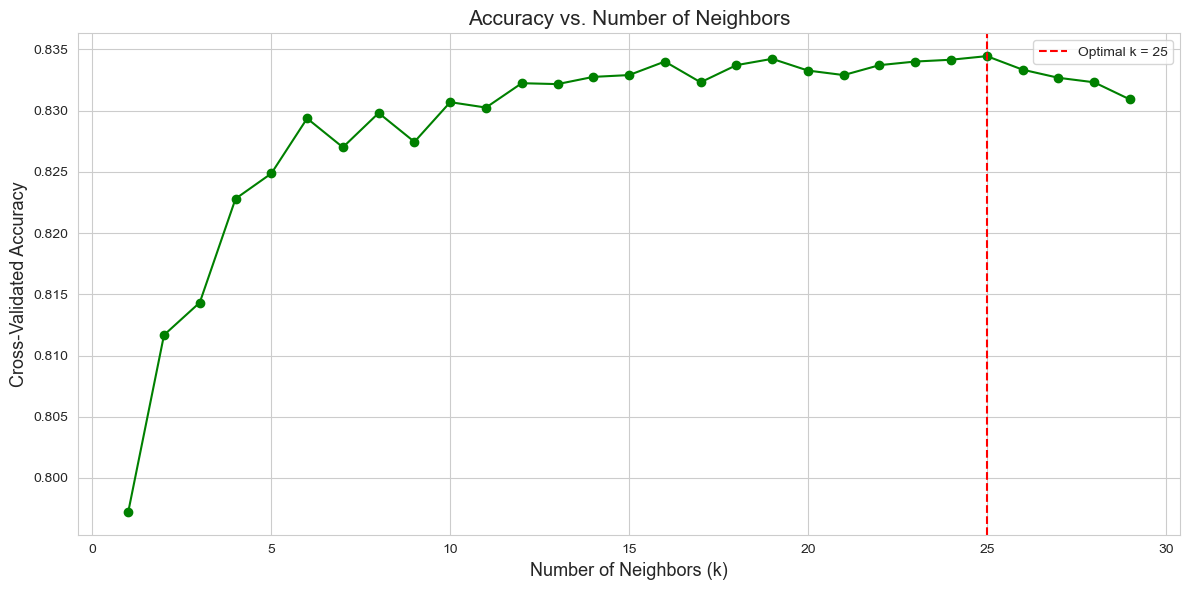

In [85]:
# Plotting the value of mean accuracy for each k
plt.figure(figsize=(12, 6))
plt.plot(range(1,Ks), mean_acc, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Neighbors (k)', fontsize=13)
plt.ylabel('Cross-Validated Accuracy', fontsize=13)
plt.title('Accuracy vs. Number of Neighbors', fontsize=15)
plt.axvline(x=mean_acc.argmax()+1, color='r', linestyle='--', label=f'Optimal k = {mean_acc.argmax()+1}')
plt.legend()
plt.tight_layout()
plt.show()

### Training the KNN model

In [91]:
# Train the k-NN model using k = 25
knn_model_income = KNeighborsClassifier(n_neighbors=25)
knn_model_income.fit(X_train, y_train)

y_predict1=knn_model_income.predict(X_test)
y_predict1

array([0, 0, 0, ..., 0, 0, 1])

In [92]:
# Evaluate the model's performance on the test set with k = 25
accuracy_25 = knn_model_income.score(X_test, y_test)
accuracy_25

0.8344512419842264

### Confusion Matrix

In [93]:
cm = confusion_matrix(y_test.values,y_predict1)
cm

array([[9403,  850],
       [1396, 1918]])

In [95]:
cm1=pd.DataFrame(data=cm,index=['<=50k', '>50k'],columns=['<=50k', '>50k'])
cm1

,<=50k,>50k
<=50k,9403,850
>50k,1396,1918


### Feature Importance

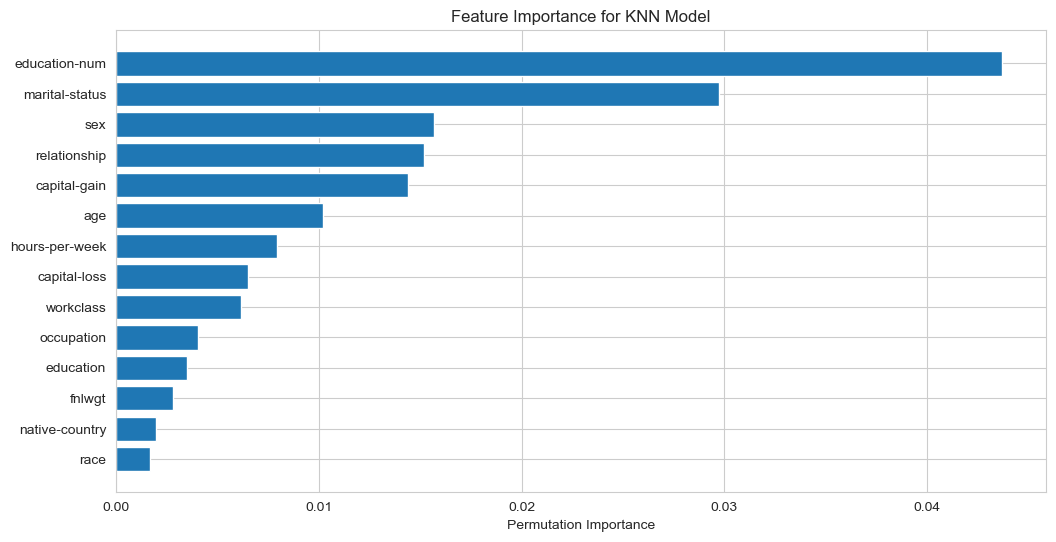

In [106]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Fit the KNN model with the optimal k value (25)
knn_model_income = KNeighborsClassifier(n_neighbors=25)
knn_model_income.fit(X_train, y_train)

# Perform permutation importance
result = permutation_importance(knn_model_income, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importances and their indices
feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances[feature_indices], align="center")
plt.yticks(range(len(feature_importances)), X.columns[feature_indices])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for KNN Model')
plt.show()